In [16]:
from google.colab import drive
import pandas as pd
import numpy as np

# Montar Google Drive
drive.mount('/content/drive/')

# Ruta del archivo de Excel
file_path = '/content/drive/MyDrive/Arquicompu/ReporteMultiplicaciónPorBloques.xlsx'

# Cargar datos de ambas hojas
df1 = pd.read_excel(file_path, 'MultiplicaciónPorBloques')

# Renombrar columnas si es necesario
df1 = df1.rename(columns={"Normalized(ns)": "Normalized_ns"})

# Convertir las columnas categóricas si es necesario
df1['version'] = pd.Categorical(df1['version'])

# Verificar la información de los datos cargados
print("Información del primer DataFrame:")
df1.info()

# @ summary data
print("//////////////// summary data  ////////////////////////////////")
Z=1.96
#E=np.sqrt()
Stat_data=df1[["Normalized_ns", "version"]].groupby("version").agg({"Normalized_ns":["min", "max", "median", "mean" ,np.std,np.var]})
Stat_data=Stat_data.Normalized_ns
print(Stat_data)
Error=Stat_data['mean']/100
print("")
print("error (ns) al 1% ")
print(Error)

print("Tamaño de muestra ")
print(Stat_data['var']*(Z*Z)/(Error*Error))
#print(rp.summary_cont(df['Normalized_ns']))
#print(rp.summary_cont(df['Normalized_ns'].groupby(df['version'])))
print(" **")


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Información del primer DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   version        770 non-null    category
 1   type           770 non-null    object  
 2   sample         770 non-null    int64   
 3   n              770 non-null    int64   
 4   block_size     770 non-null    int64   
 5   time(s)        770 non-null    float64 
 6   Normalized_ns  770 non-null    float64 
dtypes: category(1), float64(2), int64(3), object(1)
memory usage: 37.1+ KB
//////////////// summary data  ////////////////////////////////
               min       max    median      mean       std       var
version                                                             
verBlockMul  3.212  3.491556  3.230815  3.238066

===========          ANOVA para la Multiplicación De Matrices Por Bloques         ================
Usando las columnas: n y block_size
                      sum_sq     df          F        PR(>F)
C(n)                0.110402    6.0  35.185000  8.667923e-27
C(block_size)       0.008328   10.0   1.592444  1.343806e-01
C(n):C(block_size)  0.065087   60.0   2.074305  1.294118e-05
Residual            0.364504  697.0        NaN           NaN
 
Valor p para C(n): 8.667923174566661e-27
Valor p para C(block_size): 0.13438062574643636
Valor p para la interacción: 1.2941178923287617e-05
alpha: 0.05
================= -------------- =========================



/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 4
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 7
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 60, but rank is 57
  warnings.warn('covariance of constraints does not have full '


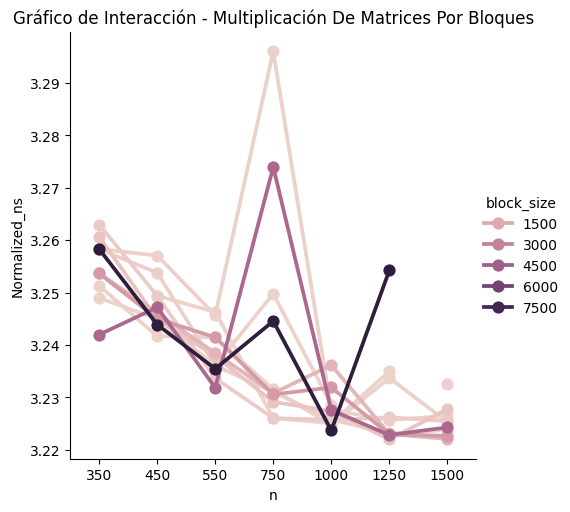

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Función para realizar ANOVA
def realizar_anova(df, variable1, variable2):
    modelo = ols(f'Q("Normalized_ns") ~ C({variable1}) + C({variable2}) + C({variable1}) * C({variable2})', data=df).fit()
    tabla_anova = anova_lm(modelo, typ=2) # Type 2 ANOVA DataFrame
    return modelo, tabla_anova

# Verificar los nombres de las columnas
variable1 = 'n'
variable2 = 'block_size'

# Realizar ANOVA en el primer conjunto de datos
print("===========          ANOVA para la Multiplicación De Matrices Por Bloques         ================")
print("Usando las columnas:", variable1, "y", variable2)
modelo1, tabla_anova1 = realizar_anova(df1, variable1, variable2)
print(tabla_anova1)
print(" ")
print("Valor p para C(n):", tabla_anova1.loc['C(n)', 'PR(>F)'])
print("Valor p para C(block_size):", tabla_anova1.loc['C(block_size)', 'PR(>F)'])
print("Valor p para la interacción:", tabla_anova1.loc['C(n):C(block_size)', 'PR(>F)'])
print("alpha: 0.05")
print("================= -------------- =========================")
print("")


# Crear gráficos de interacción para ambos conjuntos de datos
sns.catplot(x='n', y='Normalized_ns', hue='block_size', kind='point', data=df1, errorbar=None)
plt.title('Gráfico de Interacción - Multiplicación De Matrices Por Bloques')
plt.show()

